In [1]:
import numpy as np
import pandas as pd
import os
from hmmlearn.hmm import GaussianHMM
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\grace\\UNSW\\COMP4121\\COMP4121_MajorProject\\Data')

In [3]:
#Load datasets
raw_sales_df = pd.read_csv('raw_sales.csv', parse_dates=['datesold'])
ma_lga_df = pd.read_csv('ma_lga_12345.csv', parse_dates=['saledate'])

C:\Users\grace\AppData\Local\Temp\ipykernel_20276\3741783504.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ma_lga_df = pd.read_csv('ma_lga_12345.csv', parse_dates=['saledate'])


In [4]:
raw_sales_df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3
29576,2019-07-25,2612,560000,unit,2
29577,2019-07-26,2912,464950,unit,2
29578,2019-07-26,2601,589000,unit,2


In [5]:
ma_lga_df

,saledate,MA,type,bedrooms
0,2007-09-30,441854,house,2
1,2007-12-31,441854,house,2
2,2008-03-31,441854,house,2
3,2008-06-30,441854,house,2
4,2008-09-30,451583,house,2
...,...,...,...,...
342,2018-09-30,603281,unit,3
343,2018-12-31,601167,unit,3
344,2019-03-31,605637,unit,3
345,2019-06-30,599339,unit,3


In [13]:
# Step 1: Add year_quarter column to raw_sales_df
raw_sales_df['datesold'] = pd.to_datetime(raw_sales_df['datesold'])
raw_sales_df['year_quarter'] = raw_sales_df['datesold'].dt.year.astype(str) + '_Q' + raw_sales_df['datesold'].dt.quarter.astype(str)

# Step 2: Add year_quarter column to ma_lga_df
ma_lga_df['saledate'] = pd.to_datetime(ma_lga_df['saledate'])
ma_lga_df['year_quarter'] = ma_lga_df['saledate'].dt.year.astype(str) + '_Q' + ma_lga_df['saledate'].dt.quarter.astype(str)

In [14]:
raw_sales_df.head(10)

,datesold,postcode,price,propertyType,bedrooms,year_quarter
0,2007-02-07,2607,525000,house,4,2007_Q1
1,2007-02-27,2906,290000,house,3,2007_Q1
2,2007-03-07,2905,328000,house,3,2007_Q1
3,2007-03-09,2905,380000,house,4,2007_Q1
4,2007-03-21,2906,310000,house,3,2007_Q1
5,2007-04-04,2905,465000,house,4,2007_Q2
6,2007-04-24,2607,399000,house,3,2007_Q2
7,2007-04-30,2606,1530000,house,4,2007_Q2
8,2007-05-24,2902,359000,house,3,2007_Q2
9,2007-05-25,2906,320000,house,3,2007_Q2


In [15]:
ma_lga_df.head(10)

,saledate,MA,type,bedrooms,year_quarter
49,2007-03-31,421291,house,3,2007_Q1
100,2007-03-31,548969,house,4,2007_Q1
50,2007-06-30,421291,house,3,2007_Q2
248,2007-06-30,368817,unit,2,2007_Q2
101,2007-06-30,548969,house,4,2007_Q2
0,2007-09-30,441854,house,2,2007_Q3
51,2007-09-30,421291,house,3,2007_Q3
249,2007-09-30,368817,unit,2,2007_Q3
298,2007-09-30,518911,unit,3,2007_Q3
102,2007-09-30,548969,house,4,2007_Q3


In [ ]:
# Step 3: Merge the dataframes on 'year_quarter', 'bedrooms', and 'type'
merged_df = pd.merge(
    raw_sales_df, 
    ma_lga_df[['year_quarter', 'type', 'bedrooms', 'MA']],  # Only the necessary columns from ma_lga_df
    how='left',  # Perform a left join to keep all rows from raw_sales_df
    left_on=['year_quarter', 'propertyType', 'bedrooms'],  # Merging keys
    right_on=['year_quarter', 'type', 'bedrooms']  # Merging keys in ma_lga_df
)

# Step 4: Rename columns to match raw_sales_df column names
merged_df = merged_df.rename(columns={
    'propertyType': 'property_type',  # Rename 'propertyType' to 'property_type'
    'datesold': 'date_sold'          # Rename 'datesold' to 'date_sold         # Fix duplicate column issue after merge
})

# Step 5: Drop 'property_type' column (duplicate after renaming)
merged_df['MA'] = merged_df['MA'].apply(lambda x: '{:.0f}'.format(x))
merged_df = merged_df.drop(columns=['type'])

In [35]:
# Step 6: Verify the merged dataframe
print(merged_df.head())

merged_df

   date_sold  postcode   price property_type  bedrooms year_quarter      MA  \
0 2007-02-07      2607  525000         house         4      2007_Q1  548969   
1 2007-02-27      2906  290000         house         3      2007_Q1  421291   
2 2007-03-07      2905  328000         house         3      2007_Q1  421291   
3 2007-03-09      2905  380000         house         4      2007_Q1  548969   
4 2007-03-21      2906  310000         house         3      2007_Q1  421291   

   day_of_week  
0            2  
1            1  
2            2  
3            4  
4            2  


,date_sold,postcode,price,property_type,bedrooms,year_quarter,MA,day_of_week
0,2007-02-07,2607,525000,house,4,2007_Q1,548969,2
1,2007-02-27,2906,290000,house,3,2007_Q1,421291,1
2,2007-03-07,2905,328000,house,3,2007_Q1,421291,2
3,2007-03-09,2905,380000,house,4,2007_Q1,548969,4
4,2007-03-21,2906,310000,house,3,2007_Q1,421291,2
...,...,...,...,...,...,...,...,...
29575,2019-07-26,2902,657500,house,4,2019_Q3,791446,4
29576,2019-07-26,2601,589000,unit,2,2019_Q3,424412,4
29577,2019-07-27,2905,610000,house,4,2019_Q3,791446,5
29578,2019-07-27,2615,647500,house,4,2019_Q3,791446,5


Feature Engineering

Added:
- 'normalized_price'
- 'seasonality' variable
    - 0: 'Busy season'
    - 1: 'Medium Busy season'
    - 2: 'Slow season'

In [ ]:
#Feature engineering




KeyError: 'date_sold'

In [40]:
# Count the number of sales per day
sales_per_day = merged_df['date_sold'].dt.date.value_counts().sort_index()

# Find the top 10 dates with the most sales (you can adjust the number of peak dates as needed)
peak_period = sales_per_day.nlargest(10)

# Create a function to categorize the seasonality based on 'datesold'
def get_seasonality(date):
    if date in peak_period.index:
        return 'Busy season'
    elif date < peak_period.index[-1] and date >= peak_period.index[0]:
        return 'Medium busy season'
    else:
        return 'Slow season'

# Apply the function to categorize the 'datesold' and create the 'seasonality' column
merged_df['seasonality'] = merged_df['date_sold'].dt.date.apply(get_seasonality)

merged_df.head(5)

,date_sold,postcode,price,property_type,bedrooms,year_quarter,MA,day_of_week,seasonality
0,2007-02-07,2607,525000,0,4,0,548969,2,Slow season
1,2007-02-27,2906,290000,0,3,0,421291,1,Slow season
2,2007-03-07,2905,328000,0,3,0,421291,2,Slow season
3,2007-03-09,2905,380000,0,4,0,548969,4,Slow season
4,2007-03-21,2906,310000,0,3,0,421291,2,Slow season


In [ ]:
# Convert categorical variable 'propertyType' to numerical if needed
merged_df['year_quarter'] = merged_df['year_quarter'].astype('category').cat.codes  # Encode 'propertyType' as numeric
merged_df['seasonality'] = merged_df['seasonality'].astype('category').cat.codes
merged_df['property_type'] = merged_df['property_type'].astype('category').cat.codes

# Scale the features (exclude 'price' because it's the target)
scaler = StandardScaler()
features = scaler.fit_transform(merged_df[['MA', 'bedrooms']])

# Now you can proceed to use the 'features' for the HMM modeling

Exploratory Data Analysis
- Heat Map of the Correlation Matrix

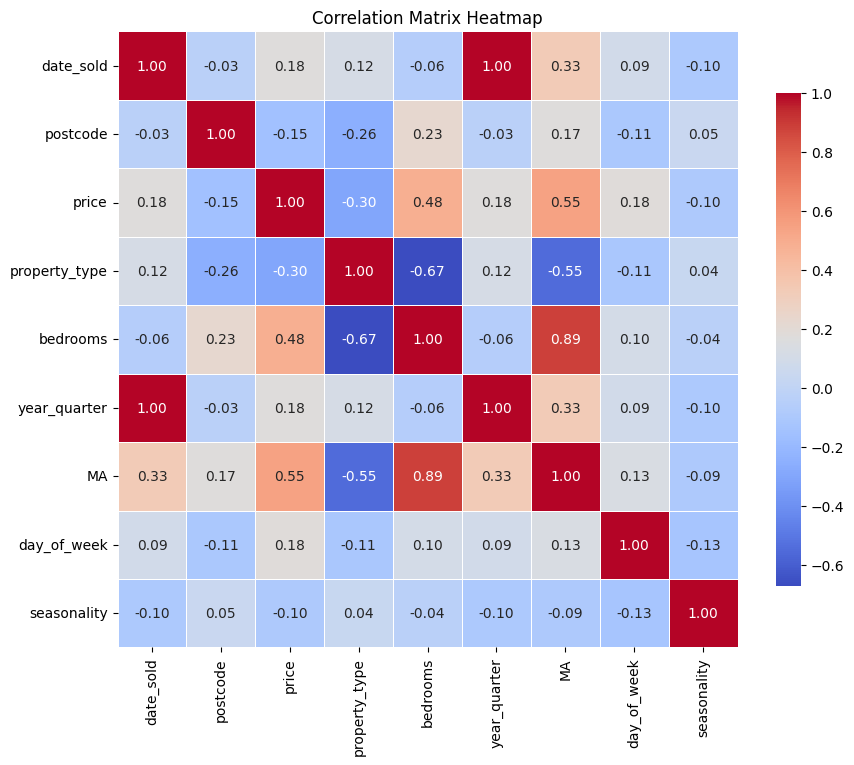

In [42]:
corr_matrix = merged_df.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the heatmap with annotations and a color map (e.g., 'coolwarm')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': .8})

# Add a title
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()


In [ ]:
def find_optimal_states(features, max_states=10):
    """
    Find the optimal number of states for HMM based on AIC and BIC.
    
    Args:
    - features (numpy.ndarray): Scaled feature matrix.
    - max_states (int): Maximum number of hidden states to test.

    Returns:
    - optimal_states_aic (int): Optimal number of states based on AIC.
    - optimal_states_bic (int): Optimal number of states based on BIC.
    - aic_scores (list): List of AIC values for each number of states.
    - bic_scores (list): List of BIC values for each number of states.
    """
    aic_scores = []
    bic_scores = []
    models = []
    
    for n_states in range(2, max_states + 1):  # Test models with 2 to max_states
        hmm = GaussianHMM(n_components=n_states, covariance_type="diag", random_state=42, n_iter=100)
        hmm.fit(features)
        models.append(hmm)
        
        # Calculate log likelihood
        log_likelihood = hmm.score(features)
        
        # Number of parameters
        num_params = n_states**2 + 2 * n_states * features.shape[1] - 1
        
        # Calculate AIC and BIC
        aic = 2 * num_params - 2 * log_likelihood
        bic = np.log(len(features)) * num_params - 2 * log_likelihood
        
        aic_scores.append(aic)
        bic_scores.append(bic)
    
    # Find optimal number of states
    optimal_states_aic = 2 + np.argmin(aic_scores)
    optimal_states_bic = 2 + np.argmin(bic_scores)
    
    return optimal_states_aic, optimal_states_bic, aic_scores, bic_scores, models

# Call the function and get AIC/BIC values
optimal_states_aic, optimal_states_bic, aic_scores, bic_scores, models = find_optimal_states(features, max_states=10)

print(f"Optimal number of states based on AIC: {optimal_states_aic}")
print(f"Optimal number of states based on BIC: {optimal_states_bic}")


Model is not converging.  Current: 106701.15719299622 is not greater than 106701.15721702401. Delta is -2.4027787731029093e-05
c:\Users\grace\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\grace\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

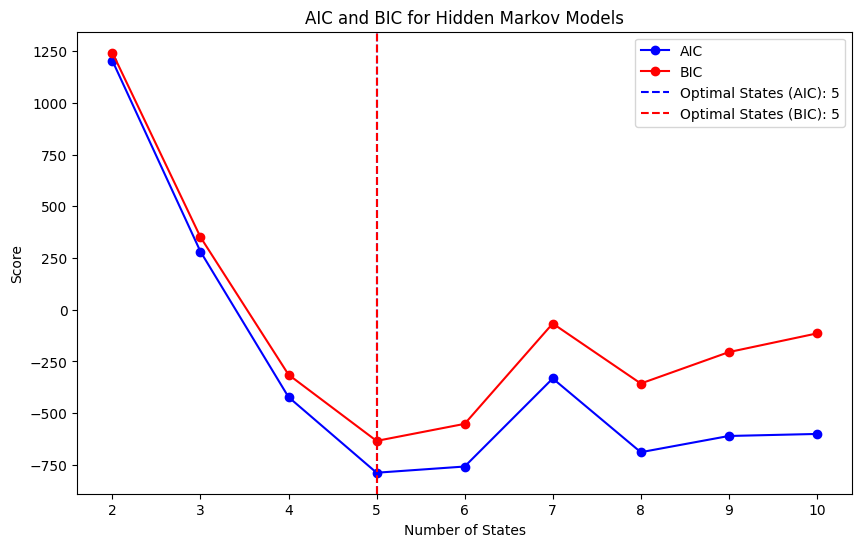

In [ ]:
# Plot AIC and BIC
states_range = range(2, len(aic_scores) + 2)

plt.figure(figsize=(10, 6))
plt.plot(states_range, aic_scores, marker='o', label='AIC', color='blue')
plt.plot(states_range, bic_scores, marker='o', label='BIC', color='red')
plt.axvline(optimal_states_aic, color='blue', linestyle='--', label=f'Optimal States (AIC): {optimal_states_aic}')
plt.axvline(optimal_states_bic, color='red', linestyle='--', label=f'Optimal States (BIC): {optimal_states_bic}')
plt.xlabel('Number of States')
plt.ylabel('Score')
plt.title('AIC and BIC for Hidden Markov Models')
plt.legend()
plt.show()


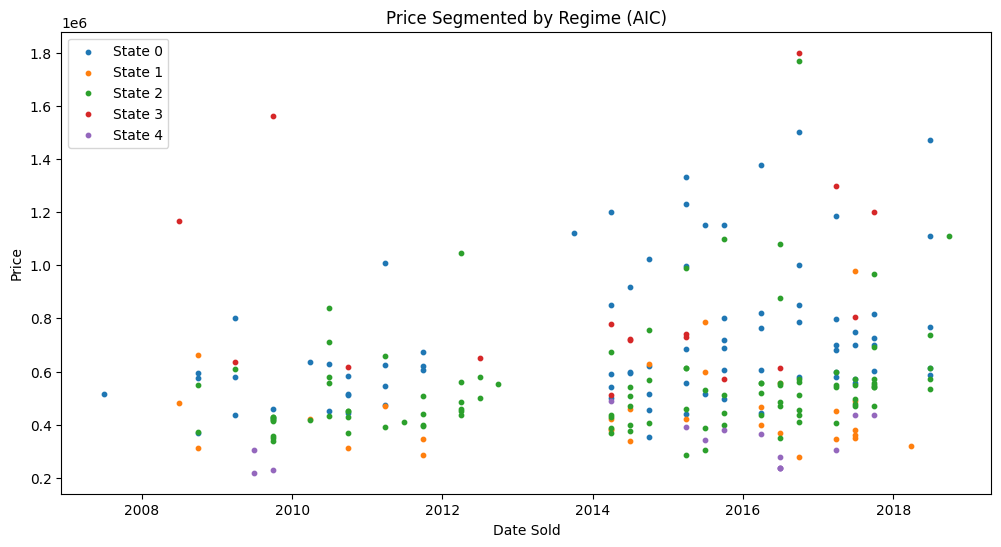

In [ ]:
# Use the model with the optimal number of states based on BIC or AIC
best_model = models[optimal_states_aic - 2]  # Adjust for 0-indexing in the models list
hidden_states = best_model.predict(features)

# Add hidden states to the dataframe
merged_df['Regime'] = hidden_states

# Plot the regimes over time
plt.figure(figsize=(12, 6))
for state in range(best_model.n_components):
    state_data = merged_df[merged_df['Regime'] == state]
    plt.scatter(state_data['datesold'], state_data['price'], label=f'State {state}', s=10)

plt.legend()
plt.title('Price Segmented by Regime (AIC)')
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.show()


1. Fit HMM to Observed Data

In [ ]:
# Train HMM with the optimal number of states
n_states = 5
hmm_model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=100, random_state=42)
hmm_model.fit(features)

GaussianHMM(n_components=5, n_iter=100, random_state=42)

2. Analyze Hidden States

In [ ]:
# Predict the hidden states (regimes) for each observation
hidden_states = hmm_model.predict(features)

# Add hidden states to the dataset
merged_df['hidden_state'] = hidden_states


In [ ]:
merged_df.head(5)

,datesold,price,MA,bedrooms,propertyType,day_of_week,day_of_month,seasonality,Regime,hidden_state
15,2007-06-30,517000,548969.0,4,0,5,0,2,0,0
265,2008-06-30,480000,441854.0,2,0,0,0,2,1,1
266,2008-06-30,1165000,735904.0,5,0,0,0,2,3,3
429,2008-09-30,312000,377481.0,2,1,1,0,2,1,1
430,2008-09-30,367500,561852.0,4,0,1,0,2,0,0


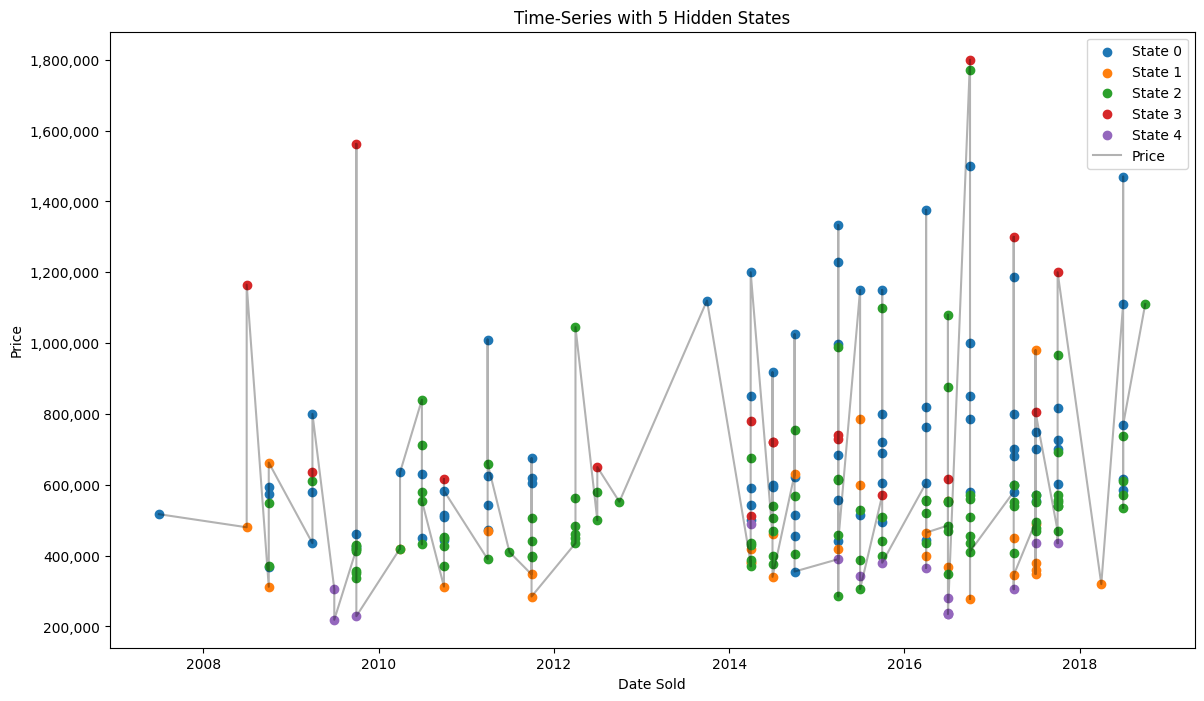

In [ ]:
plt.figure(figsize=(14, 8))

for state in range(n_states):
    # Select rows belonging to the current state
    state_indices = merged_df[merged_df['hidden_state'] == state].index
    plt.scatter(merged_df.loc[state_indices, 'datesold'], 
                merged_df.loc[state_indices, 'price'] * 1, 
                label=f"State {state}")

plt.plot(merged_df['datesold'], merged_df['price'] * 1, color="black", alpha=0.3, label="Price")

ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.legend()
plt.title("Time-Series with 5 Hidden States")
plt.xlabel("Date Sold")
plt.ylabel("Price")
plt.show()

3. Average Price and Variance for each Hidden State

In [ ]:
state_stats = merged_df.groupby('hidden_state')['price'].agg(['mean', 'var', 'count'])
state_stats = round(state_stats, 2)
print("State Statistics:")
print(state_stats)


State Statistics:
                   mean           var  count
hidden_state                                
0             719584.38  6.970342e+10     80
1             448110.83  2.406143e+10     30
2             543193.93  4.313559e+10    102
3             889720.65  1.413597e+11     17
4             325712.07  7.714046e+09     15


In [ ]:
merged_df

,datesold,price,MA,bedrooms,propertyType,day_of_week,day_of_month,seasonality,Regime,hidden_state,datesold_year,year_mean_price,year_std_price,normalized_price,low_percentile,high_percentile,price_category
0,2007-06-30,517000,548969.0,4,0,5,0,2,0,0,2007,517000.000000,NaN,NaN,517000.0,517000.0,Low-End
1,2008-06-30,480000,441854.0,2,0,0,0,2,1,1,2008,564111.111111,254505.743768,-0.165244,372000.0,594000.0,Mid-Range
2,2008-06-30,1165000,735904.0,5,0,0,0,2,3,3,2008,564111.111111,254505.743768,0.472201,372000.0,594000.0,High-End
3,2008-09-30,312000,377481.0,2,1,1,0,2,1,1,2008,564111.111111,254505.743768,-0.495296,372000.0,594000.0,Low-End
4,2008-09-30,367500,561852.0,4,0,1,0,2,0,0,2008,564111.111111,254505.743768,-0.193130,372000.0,594000.0,Low-End
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2018-06-30,612000,622466.0,3,0,5,0,2,2,2,2018,766727.272727,332133.961199,-0.155286,578000.0,939500.0,Mid-Range
240,2018-06-30,615000,837295.0,4,0,5,0,2,0,0,2018,766727.272727,332133.961199,-0.114206,578000.0,939500.0,Mid-Range
241,2018-06-30,737500,622466.0,3,0,5,0,2,2,2,2018,766727.272727,332133.961199,-0.029333,578000.0,939500.0,Mid-Range
242,2018-06-30,769000,837295.0,4,0,5,0,2,0,0,2018,766727.272727,332133.961199,0.001711,578000.0,939500.0,Mid-Range


Feature Engineering Continued:

'normalized_price': Based on median price of all properties sold in a specific year for a specific number of bedrooms

In [ ]:
yearly_stats = merged_df.groupby('datesold_year')['price'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['datesold_year', 'year_mean_price', 'year_std_price']


In [ ]:
#Normalize prices by year and bedrooms
# Extract year from 'datesold'
merged_df['datesold_year'] = merged_df['datesold'].dt.year

# Merge yearly statistics into the main DataFrame
merged_df = pd.merge(merged_df, yearly_stats, on='datesold_year', how='left')

# Normalize price using the mean price and number of bedrooms
merged_df['normalized_price'] = (
    (merged_df['price'] - merged_df['year_mean_price']) / merged_df['year_std_price']
) / merged_df['bedrooms']


In [ ]:
percentiles = merged_df.groupby('datesold_year')['price'].quantile([0.25, 0.75]).unstack()
percentiles.columns = ['low_percentile', 'high_percentile']

# Merge percentiles into the main DataFrame
merged_df = pd.merge(merged_df, percentiles, on='datesold_year', how='left')

# Categorize properties
def categorize(row):
    if row['price'] <= row['low_percentile']:
        return 'Low-End'
    elif row['price'] >= row['high_percentile']:
        return 'High-End'
    else:
        return 'Mid-Range'

merged_df['price_category'] = merged_df.apply(categorize, axis=1)


In [ ]:
yearly_stats.head(15)

,datesold_year,year_mean_price,year_std_price
0,2007,5.170000e+05,NaN
1,2008,5.641111e+05,254505.743768
2,2009,4.955895e+05,294161.136671
3,2010,5.177475e+05,126575.550016
4,2011,5.208382e+05,171123.240978
5,2012,5.719000e+05,179297.053331
6,2013,1.120000e+06,NaN
7,2014,5.654027e+05,197382.693533
8,2015,6.560080e+05,281660.764694
9,2016,6.426125e+05,386128.972201


In [ ]:
# Save n_states and X
np.savez('hmm_data.npz', n_states=n_states, X=features)

print("Variables saved to hmm_data.npz")

Variables saved to hmm_data.npz


In [ ]:
#Save merged_df
# Save the DataFrame to a CSV file
merged_df.to_csv('merged_df.csv', index=False)  # index=False to exclude row numbers
print("DataFrame saved as 'merged_df.csv'")

DataFrame saved as 'merged_df.csv'
